In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
data_path='diabetes.csv'
diabetes=pd.read_csv(data_path)
diabetes.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler


In [17]:
target_name='Outcome'
robust_scaler=RobustScaler()
#standard_scaler=StandardScaler()
X=diabetes.drop('Outcome',axis=1)
feature_names=X.columns
X = robust_scaler.fit_transform(X)
#X=standard_scaler.fit_transform(X)
y= diabetes[target_name]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=55)


In [18]:
models=pd.DataFrame(index=['train_mse','test_mse'],
                   columns=['KNN','Bagging','RandomForest','Boosting'])


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
knn_for_bagging=KNeighborsRegressor(n_neighbors=20,weights='distance',metric='euclidean')
bagging=BaggingRegressor(base_estimator=knn_for_bagging,n_estimators=15,max_features=0.75,random_state=55,n_jobs=-1)
bagging.fit(X_train,y_train)
models.loc['train_mse','Bagging']=mean_squared_error(y_pred=bagging.predict(X_train),y_true=y_train)
models.loc['test_mse','Bagging']=mean_squared_error(y_pred=bagging.predict(X_test),y_true=y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=50,max_depth=16,random_state=55,n_jobs=-1)
rf.fit(X_train,y_train)
models.loc['train_mse','RandomForest']=mean_squared_error(y_pred=rf.predict(X_train),y_true=y_train)
models.loc['test_mse','RandomForest']=mean_squared_error(y_pred=rf.predict(X_test),y_true=y_test)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=20,weights='distance',metric='euclidean',n_jobs=-1)
knn.fit(X_train,y_train)
models.loc['train_mse','KNN']=mean_squared_error(y_pred=knn.predict(X_train),y_true=y_train)
models.loc['test_mse','KNN']=mean_squared_error(y_pred=knn.predict(X_test),y_true=y_test)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
boosting=AdaBoostRegressor(n_estimators=50,learning_rate=0.05,random_state=55)

boosting.fit(X_train,y_train)
models.loc['train_mse','Boosting']=mean_squared_error(y_pred=boosting.predict(X_train),y_true=y_train)
models.loc['test_mse','Boosting']=mean_squared_error(y_pred=boosting.predict(X_test),y_true=y_test)

In [ ]:
models


,KNN,Bagging,RandomForest,Boosting
train_mse,0,0.0242209,0.0232543,0.131465
test_mse,0.175818,0.177017,0.163683,0.172739


Text(0.5,1,'Test MSE for Regression Models')

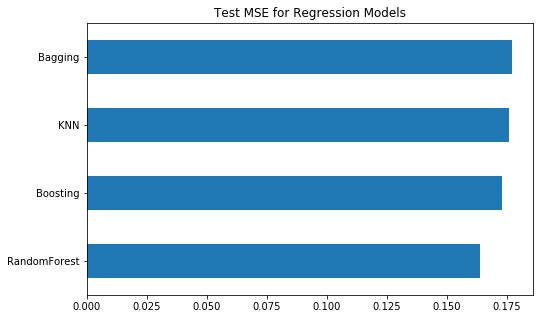

In [ ]:
fig,ax=plt.subplots(figsize=(8,5))
models.loc['test_mse'].sort_values().plot(kind='barh',ax=ax)
ax.set_title('Test MSE for Regression Models')


In [ ]:
n_pred=10
ind_pred=rf.predict(X_test[:n_pred,])
print('Real price,Predicted price :')
for i,pred in enumerate(ind_pred):
    print(round(y_test.values[i]),round(pred),sep=',')

Real price,Predicted price :
0,0.0
1,1.0
0,0.0
0,0.0
1,1.0
0,0.0
0,0.0
0,0.0
0,0.0
0,0.0



pred=input('Enter the index')
int_pred=int(pred)
pred_ind=rf.predict(X_test[int_pred:int_pred+1,])
#final_pred=enumerate(pred_ind)
for pred1 in enumerate(pred_ind):
    print(round(pred_ind))

In [ ]:
npred=input('Enter the index :')
n_pred=int(npred)
ind_pred=rf.predict(X_test[n_pred-1:n_pred,])
print('Real price,Predicted price :')
for i,pred in enumerate(ind_pred):
    print(round(y_test.values[i]),round(pred),sep=',')